# DAPL ML Zero - Getting Started with Machine Learning 

Author: Spencer Bertsch  

The purpose of this notebook is to show the different types of supervised learning and a few very simple implementations of solutions. 

All data used in this notebook came from the [UCI Machine Learning Repository.](https://archive.ics.uci.edu/ml/datasets.php)

In [7]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix

In [2]:
p: str = os.path.abspath('')
base_path: str = p + '/data/'
print(f'Your data files should be in the following directory: {base_path}')

Your data files should be in the following directory: /Users/spencerbertsch/Desktop/data/


## Classification

The goal here is to train a model how to classify samples into one of $n$ distinct sets. 

[Data source.](https://archive.ics.uci.edu/ml/machine-learning-databases/00350/)

Step 1: Read the data into memory using pandas

In [3]:
df_path: str = base_path + 'credit_default.xls'
df: pd.DataFrame = pd.read_excel(df_path, header=[1])
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
X = df.iloc[:, : -1]
y = df['default payment next month']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
# define the model
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

# train the modle
clf.fit(X_train, y_train)

# measure performance on the test set
round(clf.score(X_test, y_test), 3)

0.821

On ths surface that's not bad - let's look at the confusion matrix to see how well the model actually performs:

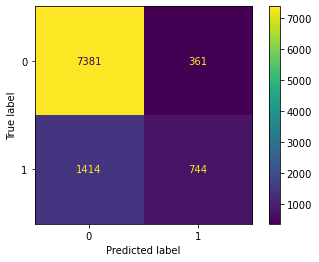

In [10]:
plot_confusion_matrix(clf, X_test, y_test)  

Not so good :| 
- What are some ways we can improve performance? 

- Implement below

In [11]:
# https://machinelearningmastery.com/configure-gradient-boosting-algorithm/